In [31]:

import pandas as pd
import matplotlib.pyplot as plt

player = 'Patrice Bergeron'

faceoff_data = pd.read_csv('data/faceoff_data.csv')

faceoff_data.tail(20)

,game_id,season,game_start_time,game_tz,play_id,game_time,description,period,coordinates,player,team,opponent,opposing_team,home_ice,power_play,penelty_kill,zone,score_diff,win
7670,2019020984,20192020,2020-02-28T00:30:00Z,EST,249,2807,Joe Pavelski faceoff won against Patrice Bergeron,3,"69.0,22.0",Patrice Bergeron,BOS,Joe Pavelski,DAL,True,False,False,ATTACKING_ZONE,2,False
7671,2019020984,20192020,2020-02-28T00:30:00Z,EST,249,2807,Joe Pavelski faceoff won against Patrice Bergeron,3,"69.0,22.0",Joe Pavelski,DAL,Patrice Bergeron,BOS,False,False,False,DEFENDING_ZONE,-2,True
7672,2019020984,20192020,2020-02-28T00:30:00Z,EST,252,2820,Mattias Janmark faceoff won against David Krejci,3,"-69.0,-22.0",David Krejci,BOS,Mattias Janmark,DAL,True,False,False,DEFENDING_ZONE,2,False
7673,2019020984,20192020,2020-02-28T00:30:00Z,EST,252,2820,Mattias Janmark faceoff won against David Krejci,3,"-69.0,-22.0",Mattias Janmark,DAL,David Krejci,BOS,False,False,False,ATTACKING_ZONE,-2,True
7674,2019020984,20192020,2020-02-28T00:30:00Z,EST,257,2871,Jamie Benn faceoff won against Charlie Coyle,3,"20.0,-22.0",Charlie Coyle,BOS,Jamie Benn,DAL,True,False,False,NEUTRAL_ZONE,2,False
7675,2019020984,20192020,2020-02-28T00:30:00Z,EST,257,2871,Jamie Benn faceoff won against Charlie Coyle,3,"20.0,-22.0",Jamie Benn,DAL,Charlie Coyle,BOS,False,False,False,NEUTRAL_ZONE,-2,True
7676,2019020984,20192020,2020-02-28T00:30:00Z,EST,260,2882,Jamie Benn faceoff won against Charlie Coyle,3,"-69.0,-22.0",Charlie Coyle,BOS,Jamie Benn,DAL,True,False,False,DEFENDING_ZONE,2,False
7677,2019020984,20192020,2020-02-28T00:30:00Z,EST,260,2882,Jamie Benn faceoff won against Charlie Coyle,3,"-69.0,-22.0",Jamie Benn,DAL,Charlie Coyle,BOS,False,False,False,ATTACKING_ZONE,-2,True
7678,2019020984,20192020,2020-02-28T00:30:00Z,EST,272,3096,Tyler Seguin faceoff won against Par Lindholm,3,"-69.0,22.0",Par Lindholm,BOS,Tyler Seguin,DAL,True,False,False,DEFENDING_ZONE,2,False
7679,2019020984,20192020,2020-02-28T00:30:00Z,EST,272,3096,Tyler Seguin faceoff won against Par Lindholm,3,"-69.0,22.0",Tyler Seguin,DAL,Par Lindholm,BOS,False,False,False,ATTACKING_ZONE,-2,True


Text(12, 40, 'Ignorable')

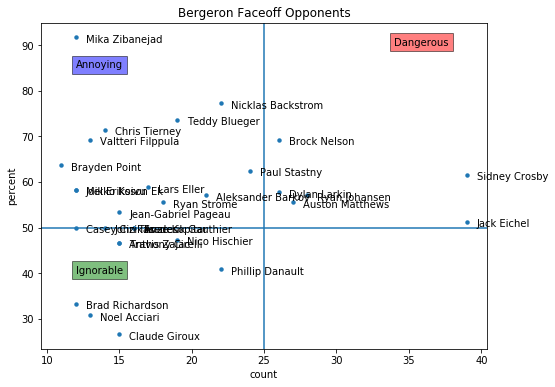

In [82]:

temp_df = faceoff_data.loc[faceoff_data['player'] == player] \
    .groupby('opponent', sort=False, as_index=False) \
    .agg({ 'game_id': 'count', 'win': 'sum'}) \
    .rename(columns={'game_id': 'count'}) \
    .set_index('opponent')

temp_df['percent'] = (temp_df['win'] / temp_df['count']) * 100

#temp_df.loc[temp_df['count'] > 10].round({'percent': 2}).sort_values('count', ascending=False).head(30)

fig, ax = plt.subplots()

temp_df.loc[temp_df['count'] > 10].round({'percent': 2}).head(30).plot( \
    'count', \
    'percent', \
    kind='scatter', \
    ax=ax, \
    linewidth=0, \
    figsize=(8,6)
)

plt.title('Bergeron Faceoff Opponents')

for k, v in temp_df.loc[temp_df['count'] > 10].round({'percent': 2}).head(30).iterrows():
    xy = [ v['count'], v['percent']]
    ax.annotate(k, xy, xytext=(10, -5), textcoords='offset points')

ax.axhline(y=50)
ax.axvline(x=25)
ax.text(34, 90, 'Dangerous', bbox=dict(facecolor='red', alpha=0.5))
ax.text(12, 85, 'Annoying', bbox=dict(facecolor='blue', alpha=0.5))
ax.text(12, 40, 'Ignorable', bbox=dict(facecolor='green', alpha=0.5))
